In [218]:
import numpy as np

# Función de activación y su derivada
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

# Clase Capa
class Capa:
    
    def __init__(self, n_entradas, n_neuronas, funcion_activacion, derivada_activacion):
        self.pesos = np.random.rand(n_entradas, n_neuronas)
        self.sesgos = np.zeros((1, n_neuronas))
        self.delta_pesos_anterior = np.zeros_like(self.pesos)
        self.funcion_activacion = funcion_activacion
        self.derivada_activacion = derivada_activacion
    
    def forward(self, entradas):
        self.salida = self.funcion_activacion(np.dot(entradas, self.pesos) + self.sesgos)

# Clase RedNeuronal
class RedNeuronal:
    def __init__(self, funcion_activacion, derivada_activacion):
        self.capas = []
        self.funcion_activacion = funcion_activacion
        self.derivada_activacion = derivada_activacion
        
    def agregar_capa(self, capa):
        self.capas.append(capa)
        
    def feedforward(self, X):
        for capa in self.capas:
            capa.forward(X)
            X = capa.salida
        return X
    
    def backprop(self, X, y, salida, lr, momentum):
        m = X.shape[0]
    
     # Calcular deltas para cada capa en reversa
        for i in reversed(range(len(self.capas))):
            capa = self.capas[i]
            if capa == self.capas[-1]:
                # Para la capa de salida
                capa.error = y - salida
                capa.delta = capa.error * self.derivada_activacion(salida)
            else:
                # Para capas ocultas
                siguiente_capa = self.capas[i + 1]
                capa.error = np.dot(siguiente_capa.delta, siguiente_capa.pesos.T)
                capa.delta = capa.error * self.derivada_activacion(capa.salida)
    
        # Actualizar pesos y sesgos usando los deltas calculados
        for i in range(len(self.capas)):
            capa = self.capas[i]
            entrada_a_usar = X if i == 0 else self.capas[i - 1].salida
        
            # Calcular los cambios de pesos y sesgos
            delta_pesos = np.dot(entrada_a_usar.T, capa.delta) * lr / m
            delta_sesgos = np.sum(capa.delta, axis=0, keepdims=True) * lr / m
        
            # Actualizar pesos y sesgos
            capa.pesos += delta_pesos + momentum * capa.delta_pesos_anterior
            capa.sesgos += delta_sesgos
            capa.delta_pesos_anterior = delta_pesos


# Conjunto de datos XOR
np.random.seed(42)
X = np.random.rand(100, 2) * 2 - 1
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
y = np.where(y, 1, -1).reshape(-1, 1)

# Crear la red neuronal
red = RedNeuronal(tanh, tanh_derivative)
red.agregar_capa(Capa(2, 4, tanh, tanh_derivative))
red.agregar_capa(Capa(4, 2, tanh, tanh_derivative))
red.agregar_capa(Capa(2, 1, tanh, tanh_derivative))

# Entrenar la red
lr = 0.01
momentum = 0.9
batch_size = 10
num_epochs = 10000

for epoch in range(num_epochs):
    for i in range(0, len(X), batch_size):
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        salida = red.feedforward(X_batch)
        red.backprop(X_batch, y_batch, salida, lr, momentum)
    if epoch % 500 == 0:
        mse = np.mean(np.square(red.feedforward(X) - y ))
        print(f'Época: {epoch}, MSE: {mse}')
mse = np.mean(np.square(red.feedforward(X) - y ))
print(f'Error final después de {num_epochs} épocas: MSE = {mse}')
  
salida = red.feedforward(X)
predicciones = np.where(salida > 0.5, 1, -1)


Época: 0, MSE: 1.1856489222692208
Época: 100000, MSE: 0.17733284492273424
Época: 200000, MSE: 0.08719002595007697
Época: 300000, MSE: 0.05894604555228873
Época: 400000, MSE: 0.048915867623937785
Época: 500000, MSE: 0.04336912055714798
Época: 600000, MSE: 0.039766794898281214
Época: 700000, MSE: 0.03719481154608344
Época: 800000, MSE: 0.035245167662985556
Época: 900000, MSE: 0.03370740993305238
Error final después de 1000000 épocas: MSE = 0.03246392780067703


In [219]:
for capa in red.capas:
    print("Pesos de la capa:", capa.pesos.shape)
    print("Sesgos de la capa:", capa.sesgos.shape)

# Calcular el MSE actual
salida = red.feedforward(X)


Pesos de la capa: (2, 4)
Sesgos de la capa: (1, 4)
Pesos de la capa: (4, 1)
Sesgos de la capa: (1, 1)


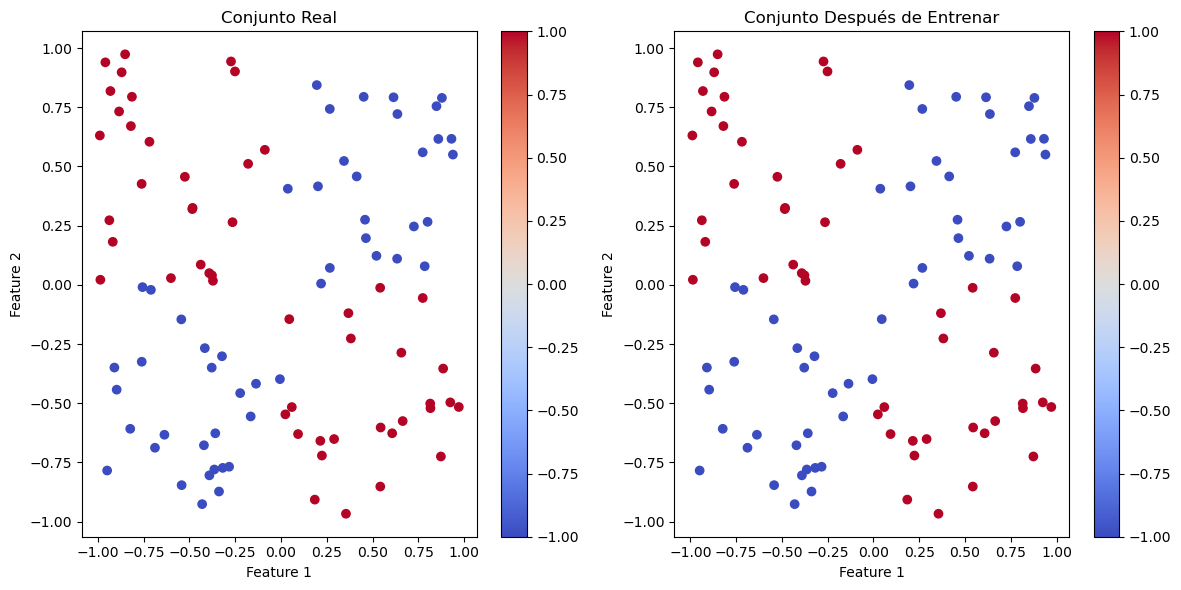

In [220]:
import matplotlib.pyplot as plt

# Graficar el conjunto real
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='coolwarm')
plt.title('Conjunto Real')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

# Graficar el conjunto después de entrenar
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predicciones.flatten(), cmap='coolwarm')
plt.title('Conjunto Después de Entrenar')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()

plt.tight_layout()
plt.show()
